In [1]:
import mdtraj as md

In [2]:
# reading the polymer membrane trajectory
pa = md.load('traj.xtc', top='conf.gro')

In [3]:
print(pa)

<mdtraj.Trajectory with 405 frames, 148650 atoms, 37808 residues, and unitcells>


In [4]:
# First 9 Frames
print(pa[1:10])

<mdtraj.Trajectory with 9 frames, 148650 atoms, 37808 residues, and unitcells>


In [5]:
# Last Trajectory
last = pa[-1]
last

<mdtraj.Trajectory with 1 frames, 148650 atoms, 37808 residues, and unitcells at 0x1f6cb6f37c8>

In [6]:
# number of atoms in last frame
last.xyz.shape

(1, 148650, 3)

In [7]:
#mean of the all atom's co-ordinate
import numpy as np
np.mean(last.xyz)

6.606356

In [8]:
# timesteps of first 9 frames
print(pa.time[0:10])

[  0.  50. 100. 150. 200. 250. 300. 350. 400. 450.]


In [9]:
# saving the last trajectpry of membrane
last.save('last.h5')

In [10]:
# importing the last frame
traj = md.load('last.h5')
print(traj)

<mdtraj.Trajectory with 1 frames, 148650 atoms, 37808 residues, and unitcells>


In [11]:
traj.n_atoms

148650

In [12]:
# How many residues we have?
traj.n_residues

37808

In [13]:
# printing coordiantes 
import pandas as pd
z = pa.xyz[:, :, :]
z[2:, : , :]

array([[[ 5.407    ,  3.344    , 13.716001 ],
        [ 5.335    ,  3.2860003, 13.637001 ],
        [ 5.3640003,  3.3460002, 13.861001 ],
        ...,
        [ 0.629    ,  7.6780005,  5.038    ],
        [ 4.9280005,  7.221    ,  1.8560001],
        [ 7.4360003,  3.7000003,  3.9900002]],

       [[ 5.4240003,  3.3300002, 13.748001 ],
        [ 5.359    ,  3.2470002, 13.683001 ],
        [ 5.3880005,  3.338    , 13.895    ],
        ...,
        [ 1.4030001,  8.082001 ,  4.2720003],
        [ 5.445    ,  7.0730004,  2.329    ],
        [ 7.2960005,  3.187    ,  2.9280002]],

       [[ 5.374    ,  3.3090003, 13.784    ],
        [ 5.3380003,  3.216    , 13.710001 ],
        [ 5.3250003,  3.3260002, 13.920001 ],
        ...,
        [ 1.1      ,  8.21     ,  4.5990005],
        [ 5.885    ,  6.464    ,  2.046    ],
        [ 6.669    ,  3.88     ,  3.7180002]],

       ...,

       [[ 5.3570004,  3.3720002, 13.736001 ],
        [ 5.3110003,  3.279    , 13.676001 ],
        [ 5.3310003,  

In [14]:
# atoms in the simulation box whom coordnates z is > 10
z[2:, : , :] > 10

array([[[False, False,  True],
        [False, False,  True],
        [False, False,  True],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False,  True],
        [False, False,  True],
        [False, False,  True],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False,  True],
        [False, False,  True],
        [False, False,  True],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False,  True],
        [False, False,  True],
        [False, False,  True],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False,  True],
        [False, False,  True],
        [False, False,  True],
        ...,
        [False, False, False],
        [False, False, False],
        [False,

In [15]:
# topology file is a different object containig atoms, residues, bonds etc. 
# creating out topology object of the membrane
topology = traj.topology

In [16]:
topology

<mdtraj.Topology with 1 chains, 37808 residues, 148650 atoms, 0 bonds at 0x1f6d0f357c8>

In [17]:
# no 5 atoms in the topology
atom = topology.atom(5)
atom

HHY1-H8A

In [18]:
# print all the atoms in topology
B = [atom for atom in topology.atoms]
B[:5]

[HHY1-C4A, HHY1-O2A, HHY1-C2A, HHY1-C1A, HHY1-C3A]

In [19]:
# Same with residues, try looking specific or all residues
print('Second residue: %s' % traj.topology.residue(1))

Second residue: HHY2


In [20]:
# what's the index of our atom?
atom.index

5

In [21]:
# serial number?
atom.serial

In [22]:
# This atom probably a hydrogen inside membrane
atom.name

'H8A'

In [23]:
atom.residue

HHY1

In [24]:
# exploring specific residue
residue = topology.residue(10)

In [25]:
residue

HHY9

In [26]:
residue.resSeq

9

In [27]:
# index of all the atoms in the topology which is oxygen also inside the sidechain of the protein
print([atom.index for atom in topology.atoms if atom.element.symbol is 'O' and atom.is_sidechain])

[96181, 96182, 96348, 96349, 96360, 96379, 96431, 96446, 96484, 96613, 96614, 96624, 96636, 96670, 96682, 96701, 96723, 96739, 96777, 96789, 96805, 96806, 96823, 96833, 96849, 96850, 96866, 96930, 96963, 96976, 97070, 97084, 97085, 97125, 97161, 97197, 97240, 97296, 97355, 97366, 97378, 97379, 97407, 97432, 97460, 97572, 97584, 97585, 97603, 97641, 97763, 97838, 97854, 97855, 97885, 98028]


In [28]:
topology.select('resid 33')

array([4724, 4725, 4726, 4727, 4728, 4729, 4730, 4731, 4732, 4733, 4734,
       4735, 4736, 4737])

In [29]:
print(topology.select('name N and backbone'))

[96069 96093 96109 96129 96136 96160 96170 96185 96204 96214 96224 96234
 96251 96273 96297 96314 96321 96340 96352 96366 96387 96411 96418 96439
 96450 96469 96476 96490 96514 96530 96540 96550 96560 96582 96602 96617
 96628 96642 96662 96676 96690 96707 96717 96731 96745 96769 96783 96797
 96809 96816 96827 96841 96853 96874 96881 96900 96919 96936 96955 96969
 96980 97004 97028 97052 97062 97076 97088 97095 97119 97133 97147 97154
 97165 97189 97203 97222 97232 97246 97265 97279 97289 97300 97310 97329
 97348 97359 97370 97382 97401 97415 97425 97436 97452 97466 97476 97486
 97508 97530 97549 97565 97576 97588 97595 97609 97616 97633 97647 97657
 97681 97697 97707 97731 97755 97769 97793 97803 97825 97832 97846 97858
 97874 97891 97901 97925 97944 97968 97975 97985 98009]


In [30]:
selection = topology.select_expression('name CA and resid 1 to 2')
print(selection)

[atom.index for atom in topology.atoms if ((atom.name == 'CA') and (1 <= atom.residue.index <= 2))]


In [31]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np

In [32]:
# investigating the corona virus protein

t = md.load('6lu7.pdb')

In [33]:
t.topology

<mdtraj.Topology with 3 chains, 395 residues, 2499 atoms, 2472 bonds at 0x1f6d08e3bc8>

In [34]:
pa = md.load('traj.xtc', top='conf.gro')

In [35]:
topology = pa.topology
print(topology)

<mdtraj.Topology with 1 chains, 37808 residues, 148650 atoms, 0 bonds>


In [36]:
prot = [atom for atom in topology.atoms if atom.residue.is_protein]

In [37]:
len(prot)

4291

In [38]:
prot[:5]

[MAA13-N2A, MAA13-HXA, MAA13-C6A, MAA13-C1A, MAA13-H4A]

In [39]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
import mdtraj.testing


In [40]:
t = md.load_pdb('http://www.rcsb.org/pdb/files/2EQQ.pdb')
print(t)

<mdtraj.Trajectory with 20 frames, 423 atoms, 28 residues, without unitcells>


C:\Users\Symon\Miniconda3\lib\site-packages\mdtraj\formats\pdb\pdbfile.py:198: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  'cell vectors.', category=UserWarning)


In [41]:
# let's calculate how many hydrogen bonds we have 

hbonds = md.baker_hubbard(t, periodic=False)
label = lambda hbond : '%s -- %s' % (t.topology.atom(hbond[0]), t.topology.atom(hbond[2]))
for hbond in hbonds:
    print(label(hbond))

GLU1-N -- GLU1-OE2
GLU1-N -- GLU1-OE1
GLY6-N -- SER4-O
CYS7-N -- GLY5-O
TYR11-N -- VAL8-O
MET12-N -- LYS20-O
ARG13-NH1 -- TYR11-O
THR14-N -- ARG18-O
ASP16-N -- ASP16-OD1
GLY17-N -- THR14-O
ARG18-N -- THR14-OG1
ARG18-NE -- ASP16-OD2
LYS20-N -- MET12-O
THR22-N -- GLY10-O
THR14-OG1 -- ASP16-OD1
THR28-OG1 -- ILE27-O


In [42]:
da_distances = md.compute_distances(t, hbonds[:, [0,2]], periodic=False)

Text(0.5, 0, 'Donor-acceptor distance [nm]')

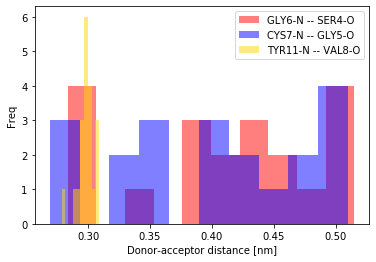

In [43]:
color = itertools.cycle(['r', 'b', 'gold'])
for i in [2, 3, 4]:
    plt.hist(da_distances[:, i], color=next(color), label=label(hbonds[i]), alpha=0.5)
plt.legend()
plt.ylabel('Freq');
plt.xlabel('Donor-acceptor distance [nm]')

In [44]:
# calculate the native contacts 

from itertools import combinations

def best_hummer_q(traj, native):
  
    
    BETA_CONST = 50  # 1/nm
    LAMBDA_CONST = 1.8
    NATIVE_CUTOFF = 0.45  # nanometers
    
    # get the indices of all of the heavy atoms
    heavy = native.topology.select_atom_indices('heavy')
    # get the pairs of heavy atoms which are farther than 3
    # residues apart
    heavy_pairs = np.array(
        [(i,j) for (i,j) in combinations(heavy, 2)
            if abs(native.topology.atom(i).residue.index - \
                   native.topology.atom(j).residue.index) > 3])
    
    # compute the distances between these pairs in the native state
    heavy_pairs_distances = md.compute_distances(native[0], heavy_pairs)[0]
    # and get the pairs s.t. the distance is less than NATIVE_CUTOFF
    native_contacts = heavy_pairs[heavy_pairs_distances < NATIVE_CUTOFF]
    print("Number of native contacts", len(native_contacts))
    
    # now compute these distances for the whole trajectory
    r = md.compute_distances(traj, native_contacts)
    # and recompute them for just the native state
    r0 = md.compute_distances(native[0], native_contacts)
    
    q = np.mean(1.0 / (1 + np.exp(BETA_CONST * (r - LAMBDA_CONST * r0))), axis=1)
    return q  

In [45]:

traj = md.load_pdb('http://www.rcsb.org/pdb/files/2MI7.pdb')

q = best_hummer_q(traj, traj[0])

Number of native contacts 526


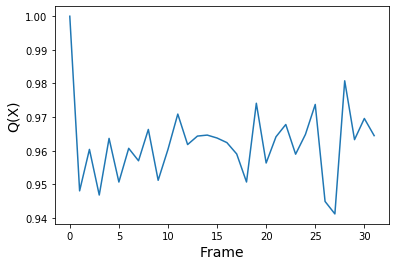

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(q)
plt.xlabel('Frame', fontsize=14)
plt.ylabel('Q(X)', fontsize=14)
plt.show()